In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
from datascience import *
import matplotlib
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
pip install openpyxl

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# function to convert dataframe into table
def df_to_ta (df):
    df.to_csv(r'temp.csv', index=False)
    return Table.read_table('temp.csv')

# function to convert table into dataframe
def ta_to_df (ta):
    ta.to_csv(r'temp.csv')
    return pd.read_csv('temp.csv')

# read selected sheet of the file with deleting useless head rows
def pd_read_change(sheet_name):
    sheet_name_list = ['Table 1', 'Table 2', 'Table 3', 'Table 4', 'Table 5', 'Table 6']
    temp = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name_list[sheet_name - 1])
    temp.drop(temp.index[0:14], inplace=True)
    temp.iloc[0,:5] = ["Sort order", "Country", "Notes",
               "Country code", "Type of data (a)"]
    temp_list = temp.iloc[0,:]
    temp.drop(temp.index[0], inplace=True)
    temp.columns = temp_list
    temp = temp.set_index("Sort order")
    return temp


In [4]:
# 2.1 International migrant stock at mid-year
data1 = pd_read_change(1)
data1 = data1.drop(columns=["Notes", "Type of data (a)"])
data1.columns = ["Country", "Country code", "1990", "1995", "2000", "2005", "2010",
               "2015", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015",
                "f1990", "f1995", "f2000", "f2005", "f2010", "f2015"]
data1 = data1.dropna()

In [5]:
for item in data1.columns[1:]:
    data1[item] = pd.to_numeric(data1[item], errors='coerce')
data1 = data1.dropna()

In [6]:
data1

,Country,Country code,1990,1995,2000,2005,2010,2015,m1990,m1995,m2000,m2005,m2010,m2015,f1990,f1995,f2000,f2005,f2010,f2015
Sort order,,,,,,,,,,,,,,,,,,,,
1,WORLD,900,152563212.0,160801752.0,172703309.0,191269100.0,221714243.0,243700236.0,77747510.0,81737477.0,87884839.0,97866674.0,114613714.0,126115435.0,74815702.0,79064275.0,84818470.0,93402426.0,107100529.0,117584801.0
2,Developed regions,901,82378628.0,92306854.0,103375363.0,117181109.0,132560325.0,140481955.0,40263397.0,45092799.0,50536796.0,57217777.0,64081077.0,67618619.0,42115231.0,47214055.0,52838567.0,59963332.0,68479248.0,72863336.0
3,Developing regions,902,70184584.0,68494898.0,69327946.0,74087991.0,89153918.0,103218281.0,37484113.0,36644678.0,37348043.0,40648897.0,50532637.0,58496816.0,32700471.0,31850220.0,31979903.0,33439094.0,38621281.0,44721465.0
4,Least developed countries,941,11075966.0,11711703.0,10077824.0,9809634.0,10018128.0,11951316.0,5843107.0,6142712.0,5361902.0,5383009.0,5462714.0,6463217.0,5236216.0,5573685.0,4721920.0,4432371.0,4560536.0,5493028.0
5,Less developed regions excluding least develop...,934,59105261.0,56778501.0,59244124.0,64272611.0,79130668.0,91262036.0,31641006.0,30501966.0,31986141.0,35265888.0,45069923.0,52033599.0,27464255.0,26276535.0,27257983.0,29006723.0,34060745.0,39228437.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Samoa,882,3357.0,4694.0,5998.0,5746.0,5122.0,4929.0,1771.0,2451.0,3101.0,2940.0,2594.0,2469.0,1586.0,2243.0,2897.0,2806.0,2528.0,2460.0
262,Tokelau,772,270.0,266.0,262.0,258.0,429.0,487.0,150.0,147.0,144.0,133.0,206.0,233.0,120.0,119.0,118.0,125.0,223.0,254.0
263,Tonga,776,2911.0,3274.0,3684.0,4301.0,5022.0,5731.0,1488.0,1718.0,1981.0,2328.0,2727.0,3127.0,1423.0,1556.0,1703.0,1973.0,2295.0,2604.0


In [7]:
data1 = data1[data1["Country code"] < 900]
data1 = data1.drop(columns=["Country code"])

In [8]:
data1 = df_to_ta(data1)
data1 = data1.sort("1990", descending=True)
data1 = ta_to_df(data1)

In [9]:
data1_top = data1.head(10)
data1_top = df_to_ta(data1_top)
data1_top

Country,1990,1995,2000,2005,2010,2015,m1990,m1995,m2000,m2005,m2010,m2015,f1990,f1995,f2000,f2005,f2010,f2015
United States of America,2.3251e+07,2.84511e+07,3.48141e+07,3.92583e+07,4.41836e+07,4.66271e+07,1.1373e+07,1.40322e+07,1.73108e+07,1.96149e+07,2.16942e+07,2.28243e+07,1.1878e+07,1.44189e+07,1.75033e+07,1.96434e+07,2.24895e+07,2.38028e+07
Russian Federation,1.15249e+07,1.19289e+07,1.19003e+07,1.16676e+07,1.11947e+07,1.16433e+07,5.65542e+06,5.92545e+06,5.98285e+06,5.8066e+06,5.5144e+06,5.71521e+06,5.86953e+06,6.00348e+06,5.91745e+06,5.86099e+06,5.68031e+06,5.92806e+06
India,7.4932e+06,6.95224e+06,6.41127e+06,5.92364e+06,5.43601e+06,5.24096e+06,3.9144e+06,3.60898e+06,3.30356e+06,3.04569e+06,2.78783e+06,2.68468e+06,3.57881e+06,3.34326e+06,3.10771e+06,2.87795e+06,2.64819e+06,2.55628e+06
Ukraine,6.89292e+06,6.17234e+06,5.52709e+06,5.0503e+06,4.81877e+06,4.8349e+06,2.9536e+06,2.64484e+06,2.36836e+06,2.16806e+06,2.07247e+06,2.08323e+06,3.93932e+06,3.52749e+06,3.15872e+06,2.88224e+06,2.74629e+06,2.75167e+06
Pakistan,6.2082e+06,3.66931e+06,4.18191e+06,3.17113e+06,3.94159e+06,3.62896e+06,3.26438e+06,1.95122e+06,2.24996e+06,1.70851e+06,2.07444e+06,1.85414e+06,2.94382e+06,1.71808e+06,1.93195e+06,1.46262e+06,1.86714e+06,1.77482e+06
Germany,5.93618e+06,7.46441e+06,8.99263e+06,1.02992e+07,1.16057e+07,1.20057e+07,3.29313e+06,3.8984e+06,4.50367e+06,5.01168e+06,5.5197e+06,5.70994e+06,2.64305e+06,3.56601e+06,4.48896e+06,5.28748e+06,6.08599e+06,6.29575e+06
France,5.89727e+06,6.08799e+06,6.27872e+06,6.7376e+06,7.19648e+06,7.78442e+06,2.99938e+06,3.04608e+06,3.09279e+06,3.30086e+06,3.50893e+06,3.78262e+06,2.89789e+06,3.04191e+06,3.18593e+06,3.43674e+06,3.68755e+06,4.0018e+06
Saudi Arabia,4.99844e+06,5.1227e+06,5.26339e+06,6.50182e+06,8.42996e+06,1.01859e+07,3.32487e+06,3.41648e+06,3.51777e+06,4.46980e+06,5.93328e+06,6.9386e+06,1.67357e+06,1.70622e+06,1.74562e+06,2.03201e+06,2.49668e+06,3.24735e+06
Canada,4.33332e+06,4.86478e+06,5.51191e+06,6.07898e+06,7.01123e+06,7.8355e+06,2.10965e+06,2.35610e+06,2.65914e+06,2.91584e+06,3.35621e+06,3.74827e+06,2.22367e+06,2.50867e+06,2.85278e+06,3.16315e+06,3.65502e+06,4.08724e+06
Iran (Islamic Republic of),4.2916e+06,2.93767e+06,2.80380e+06,2.56893e+06,2.76156e+06,2.72642e+06,2.4567e+06,1.70597e+06,1.66226e+06,1.41032e+06,1.57172e+06,1.44524e+06,1.8349e+06,1.2317e+06,1.14154e+06,1.15861e+06,1.18984e+06,1.28118e+06


In [10]:
data1_both_sex = data1_top.select("Country", "1990", "1995", "2000", "2005", "2010", "2015")
data1_both_sex

Country,1990,1995,2000,2005,2010,2015
United States of America,2.3251e+07,2.84511e+07,3.48141e+07,3.92583e+07,4.41836e+07,4.66271e+07
Russian Federation,1.15249e+07,1.19289e+07,1.19003e+07,1.16676e+07,1.11947e+07,1.16433e+07
India,7.4932e+06,6.95224e+06,6.41127e+06,5.92364e+06,5.43601e+06,5.24096e+06
Ukraine,6.89292e+06,6.17234e+06,5.52709e+06,5.0503e+06,4.81877e+06,4.8349e+06
Pakistan,6.2082e+06,3.66931e+06,4.18191e+06,3.17113e+06,3.94159e+06,3.62896e+06
Germany,5.93618e+06,7.46441e+06,8.99263e+06,1.02992e+07,1.16057e+07,1.20057e+07
France,5.89727e+06,6.08799e+06,6.27872e+06,6.7376e+06,7.19648e+06,7.78442e+06
Saudi Arabia,4.99844e+06,5.1227e+06,5.26339e+06,6.50182e+06,8.42996e+06,1.01859e+07
Canada,4.33332e+06,4.86478e+06,5.51191e+06,6.07898e+06,7.01123e+06,7.8355e+06
Iran (Islamic Republic of),4.2916e+06,2.93767e+06,2.80380e+06,2.56893e+06,2.76156e+06,2.72642e+06


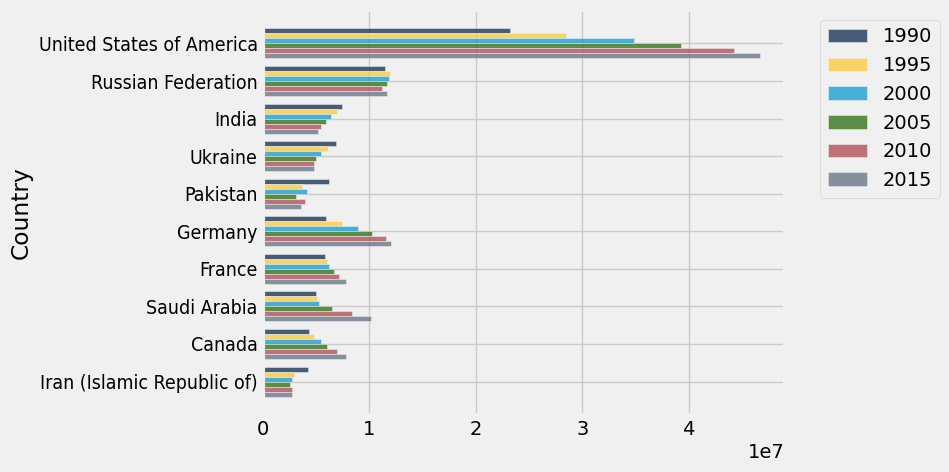

In [12]:
# figure
figure1 = data1_both_sex.barh("Country")

In [13]:
# chart
ch11 = data1_top.select("Country", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015",
                "f1990", "f1990", "f1995", "f2000", "f2005", "f2010", "f2015")
ch11 = ta_to_df(ch11)
ch11 = ch11.melt(id_vars = ["Country"], var_name = "genderyear", value_name = "International migrant stock at mid-year")
ch11 = ch11.assign(gender = lambda x: x.genderyear.str[0].astype(str), year = lambda x: x.genderyear.str[1:].astype(str)).drop("genderyear", axis = 1).replace(to_replace=["m", "f"], value=["male", "female"])

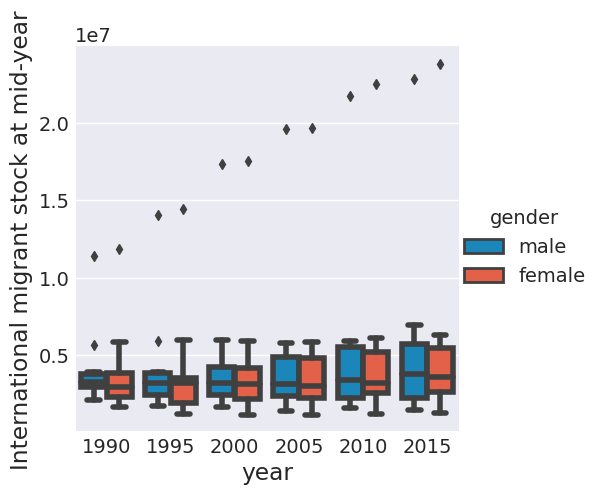

In [14]:
sns.set_style("darkgrid")
sns.catplot(data=ch11, kind="box", x="year", y="International migrant stock at mid-year", hue="gender")

In [15]:
# chart 
ch12 = df_to_ta(data1)
ch12 = ch12.select("Country", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015",
                "f1990", "f1990", "f1995", "f2000", "f2005", "f2010", "f2015")
ch12 = ta_to_df(ch12)
ch12 = ch12.melt(id_vars = ["Country"], var_name = "genderyear", value_name = "International migrant stock at mid-year")
ch12 = ch12.assign(gender = lambda x: x.genderyear.str[0].astype(str), year = lambda x: x.genderyear.str[1:].astype(str)).drop("genderyear", axis = 1).replace(to_replace=["m", "f"], value=["male", "female"])

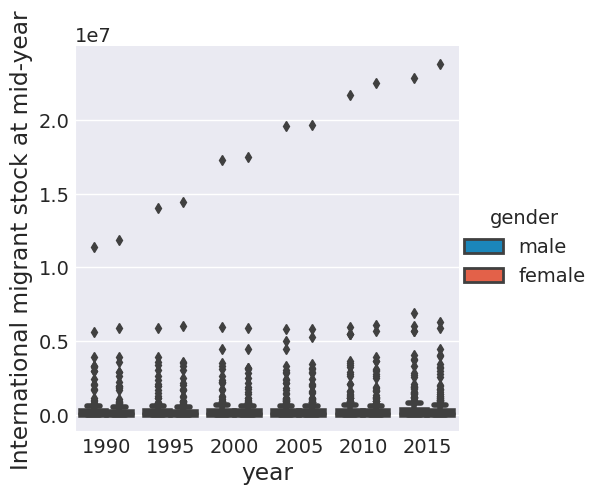

In [16]:
sns.catplot(data=ch12, kind="box", x="year", y="International migrant stock at mid-year", hue="gender")

In [17]:
# Table 2
data2 = pd_read_change(2)
data2 = data2.drop(columns=["Notes"])
data2.columns = ["Country", "Country code", "1990", "1995", "2000", "2005", "2010",
               "2015", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015",
                "f1990", "f1995", "f2000", "f2005", "f2010", "f2015"]
data2

,Country,Country code,1990,1995,2000,2005,2010,2015,m1990,m1995,m2000,m2005,m2010,m2015,f1990,f1995,f2000,f2005,f2010,f2015
Sort order,,,,,,,,,,,,,,,,,,,,
1,WORLD,900,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2670423.701,2886635.893,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
2,Developed regions,901,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555255.626,568268.456,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
3,Developing regions,902,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2115168.075,2318367.437,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
4,Least developed countries,941,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,254042.556,292026.742,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
5,Less developed regions excluding least develop...,934,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,1861125.519,2026340.695,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Samoa,882,162.865,170.158,174.614,179.928,186.029,193.228,85.009,88.488,90.932,93.185,95.95,99.644,77.856,81.67,83.682,86.743,90.079,93.584
262,Tokelau,772,1.609,1.520,1.552,1.210,1.135,1.250,..,..,..,..,..,..,..,..,..,..,..,..
263,Tonga,776,95.152,95.889,97.898,100.858,103.947,106.170,48.247,48.614,49.788,50.574,52.055,53.239,46.905,47.275,48.11,50.284,51.892,52.931


In [18]:
for item in data2.columns[1:]:
    data2[item] = pd.to_numeric(data2[item], errors='coerce')
data2 = data2.dropna()

In [19]:
data2

,Country,Country code,1990,1995,2000,2005,2010,2015,m1990,m1995,m2000,m2005,m2010,m2015,f1990,f1995,f2000,f2005,f2010,f2015
Sort order,,,,,,,,,,,,,,,,,,,,
1,WORLD,900,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2670423.701,2886635.893,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
2,Developed regions,901,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555255.626,568268.456,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
3,Developing regions,902,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2115168.075,2318367.437,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
4,Least developed countries,941,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,254042.556,292026.742,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
5,Less developed regions excluding least develop...,934,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,1861125.519,2026340.695,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Micronesia (Federated States of),583,96.331,107.556,107.430,106.198,103.619,104.460,49.274,54.977,54.384,53.968,52.900,53.510,47.057,52.579,53.046,52.230,50.719,50.950
256,Polynesia,957,547.869,579.483,612.495,641.022,660.109,684.460,282.942,298.762,314.995,327.762,336.596,348.345,264.927,280.721,297.500,313.260,323.513,336.115
259,French Polynesia,258,198.370,215.200,237.267,254.884,268.065,282.764,103.071,111.784,122.148,130.732,137.294,144.296,95.299,103.416,115.119,124.152,130.771,138.468


In [20]:
data2 = data2[data2["Country code"] < 900]
data2 = data2.drop(columns=["Country code"])

In [21]:
data2 = df_to_ta(data2)
data2 = data2.sort("1990", descending=True)
data2 = ta_to_df(data2)

In [22]:
data2_top = data2.head(10)
data2_top = df_to_ta(data2_top)
data2_top

Country,1990,1995,2000,2005,2010,2015,m1990,m1995,m2000,m2005,m2010,m2015,f1990,f1995,f2000,f2005,f2010,f2015
China,1.15461e+06,1.22784e+06,1.26997e+06,1.3056e+06,1.34097e+06,1.37605e+06,592506,630561,652374,671410,690256,708977,562099,597281,617600,634191,650712,667072
India,870602,960875,1.05348e+06,1.14433e+06,1.23098e+06,1.31105e+06,450560,497499,545691,593104,638355,679548,420042,463376,507790,551223,592630,631502
United States of America,252848,266276,282896,296140,309876,321774,123979,130962,139559,146375,153292,159494,128868,135313,143337,149764,156584,162280
Indonesia,181437,196958,211540,226255,241613,257564,91116,98525.6,105868,113587,121773,129688,90320.8,98432.2,105672,112667,119840,127876
Brazil,150393,162755,175786,188479,198614,207848,74584.9,80546.1,86860.4,93000.6,97829.6,102201,75808.2,82208.9,88926,95478.6,100785,105647
Russian Federation,147569,148293,146401,143623,143158,143457,69087.1,69570.7,68511.2,66836.4,66390.4,66644,78481.5,78722.6,77889.7,76786.2,76767.6,76812.9
Japan,122249,124483,125715,126979,127320,126573,59943.4,61010.3,61490.4,61955.5,62017.8,61558.6,62305.9,63473,64224.2,65023.2,65302,65014.9
Pakistan,107608,122600,138250,153356,170044,188925,55779.1,63356.7,71329.7,79029,87415.2,97052.3,51828.5,59243,66920.8,74327.4,82628.7,91872.6
Bangladesh,105983,118428,131281,142930,151617,160996,54175.3,60474.6,67000.5,72793.4,76666.2,81277,51807.8,57953.2,64280.3,70136.6,74950.6,79718.7
Nigeria,95617.3,108425,122877,139611,159425,182202,48276.2,54793,62209.6,70831.8,81050.7,92788.9,47341.1,53631.8,60667.1,68779.5,78374.1,89413


In [23]:
data2_both_sex = data2_top.select("Country", "1990", "1995", "2000", "2005", "2010", "2015")
data2_both_sex

Country,1990,1995,2000,2005,2010,2015
China,1.15461e+06,1.22784e+06,1.26997e+06,1.3056e+06,1.34097e+06,1.37605e+06
India,870602,960875,1.05348e+06,1.14433e+06,1.23098e+06,1.31105e+06
United States of America,252848,266276,282896,296140,309876,321774
Indonesia,181437,196958,211540,226255,241613,257564
Brazil,150393,162755,175786,188479,198614,207848
Russian Federation,147569,148293,146401,143623,143158,143457
Japan,122249,124483,125715,126979,127320,126573
Pakistan,107608,122600,138250,153356,170044,188925
Bangladesh,105983,118428,131281,142930,151617,160996
Nigeria,95617.3,108425,122877,139611,159425,182202


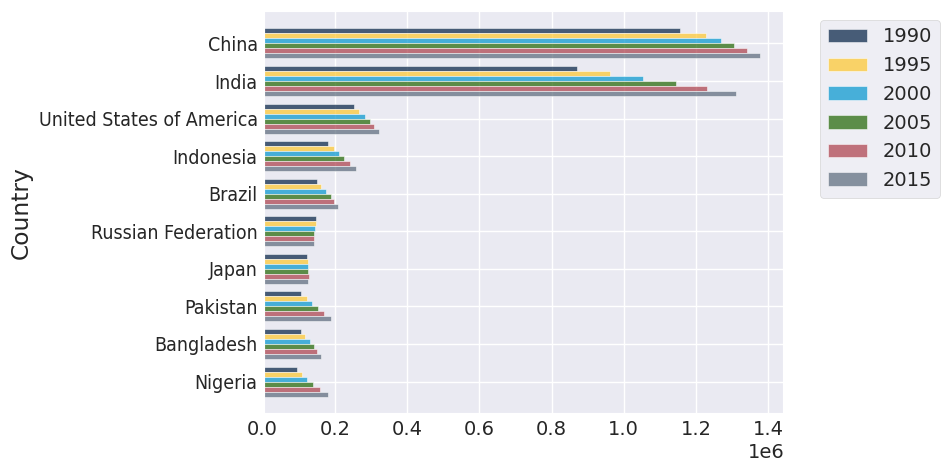

In [24]:
# figure
figure2 = data2_both_sex.barh("Country")

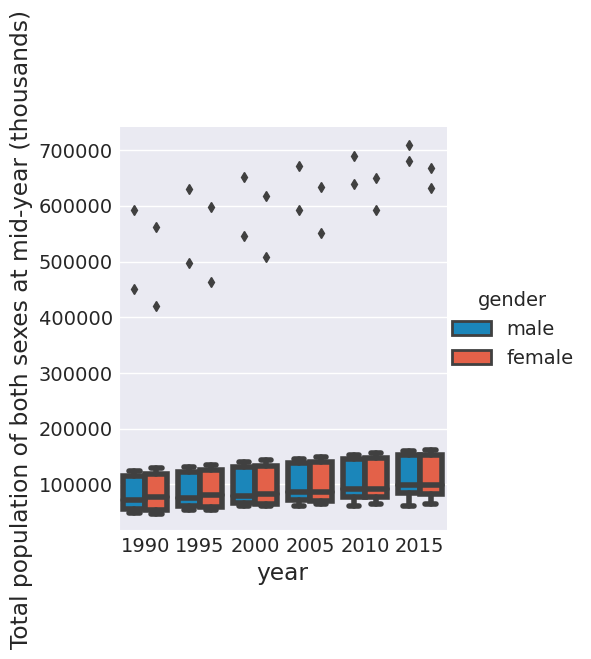

In [25]:
# chart
ch21 = data2_top.select("Country", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015",
                "f1990", "f1990", "f1995", "f2000", "f2005", "f2010", "f2015")
ch21 = ta_to_df(ch21)
ch21 = ch21.melt(id_vars = ["Country"], var_name = "genderyear", value_name = "Total population of both sexes at mid-year (thousands)")
ch21 = ch21.assign(gender = lambda x: x.genderyear.str[0].astype(str), year = lambda x: x.genderyear.str[1:].astype(str)).drop("genderyear", axis = 1).replace(to_replace=["m", "f"], value=["male", "female"])


sns.set_style("darkgrid")
sns.catplot(data=ch21, kind="box", x="year", y="Total population of both sexes at mid-year (thousands)", hue="gender")

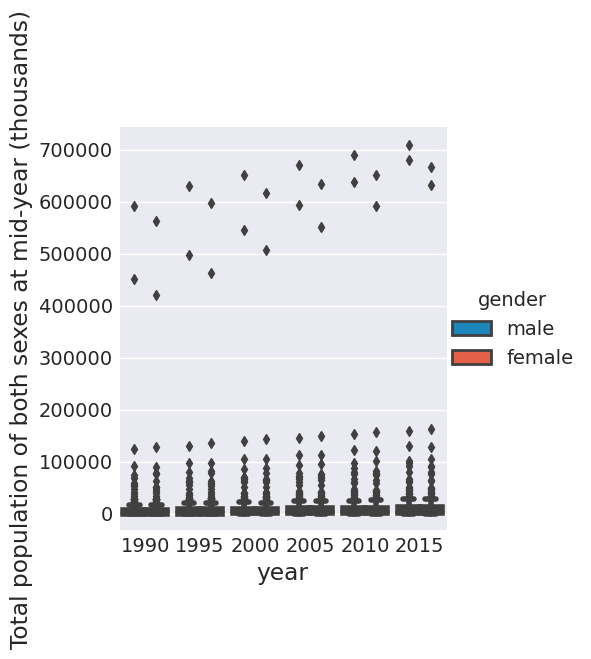

In [26]:
# chart
ch22 = df_to_ta(data2)
ch22 = ch22.select("Country", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015",
                "f1990", "f1990", "f1995", "f2000", "f2005", "f2010", "f2015")
ch22 = ta_to_df(ch22)
ch22 = ch22.melt(id_vars = ["Country"], var_name = "genderyear", value_name = "Total population of both sexes at mid-year (thousands)")
ch22 = ch22.assign(gender = lambda x: x.genderyear.str[0].astype(str), year = lambda x: x.genderyear.str[1:].astype(str)).drop("genderyear", axis = 1).replace(to_replace=["m", "f"], value=["male", "female"])


sns.catplot(data=ch22, kind="box", x="year", y="Total population of both sexes at mid-year (thousands)", hue="gender")

In [27]:
# Talbe 3
data3 = pd_read_change(3)
data3 = data3.drop(columns=["Notes", "Type of data (a)"])
data3.columns = ["Country", "Country code", "1990", "1995", "2000", "2005", "2010",
               "2015", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015",
                "f1990", "f1995", "f2000", "f2005", "f2010", "f2015"]

for item in data3.columns[1:]:
    data3[item] = pd.to_numeric(data3[item], errors='coerce')
data3 = data3.dropna()

data3 = data3[data3["Country code"] < 900]
data3 = data3.drop(columns=["Country code"])


data3 = df_to_ta(data3)
data3 = data3.sort("1990", descending=True)
data3 = ta_to_df(data3)

In [28]:
data3_top = data3.head(10)
data3_top = df_to_ta(data3_top)
data3_top

Country,1990,1995,2000,2005,2010,2015,m1990,m1995,m2000,m2005,m2010,m2015,f1990,f1995,f2000,f2005,f2010,f2015
United Arab Emirates,72.1283,77.6157,80.2155,73.2051,87.8402,88.404,78.2207,83.6278,85.04,74.9636,87.6688,90.1126,60.4177,65.6005,70.0835,68.8826,88.3496,83.7235
Qatar,65.0089,72.1875,60.6109,77.1905,82.4923,75.4976,70.8249,81.7757,71.0698,89.3183,90.6979,87.2294,53.2275,53.6633,41.1681,52.9238,57.4093,44.353
"China, Macao Special Administrative Region",56.9995,56.4497,55.7507,59.6622,59.5755,58.3219,55.0552,53.7082,52.4375,58.1208,57.0716,55.0127,58.8425,59.0252,58.8459,61.0805,61.8852,61.3966
French Guiana,54.9412,51.0415,46.9772,42.4915,41.1848,39.5032,57.7578,51.7743,46.1821,42.392,39.8531,37.5451,51.8772,50.2531,47.8256,42.5891,42.5151,41.4594
Guam,53.4595,49.403,47.6862,47.1859,47.3006,44.7885,56.5502,51.1785,48.1952,47.8055,48.0407,45.5538,49.9253,47.4708,47.1535,46.5417,46.5358,44.0011
Kuwait,52.1845,56.3187,58.443,58.9028,61.1719,73.6396,59.6398,61.8017,67.2199,69.1638,75.9632,86.3606,43.6639,48.6021,45.9612,44.3352,42.0704,57.3329
United States Virgin Islands,50.3327,50.684,52.1707,52.5638,53.2835,53.3639,49.6391,50.1753,51.5297,51.8016,52.562,52.7867,50.9841,51.1531,52.7579,53.2639,53.9438,53.889
Channel Islands,43.8334,42.0125,43.2348,45.9766,48.6148,50.2816,42.4068,40.6622,41.6509,44.3288,46.8079,48.4906,45.1835,43.2893,44.7449,47.5687,50.3866,52.0414
"China, Hong Kong Special Administrative Region",38.2889,39.7721,39.3473,39.7698,39.7501,38.9499,37.9598,38.2242,37.0911,36.2405,34.9777,32.7316,38.6333,41.322,41.4901,43.0006,43.9672,44.4531
Israel,36.2891,33.6143,30.7848,28.6129,26.2873,24.9469,34.3258,31.5328,28.8056,26.6349,24.2935,22.8303,38.2452,35.6454,32.7079,30.5392,28.2331,27.0287


In [29]:
data3_both_sex = data3_top.select("Country", "1990", "1995", "2000", "2005", "2010", "2015")
data3_both_sex

Country,1990,1995,2000,2005,2010,2015
United Arab Emirates,72.1283,77.6157,80.2155,73.2051,87.8402,88.404
Qatar,65.0089,72.1875,60.6109,77.1905,82.4923,75.4976
"China, Macao Special Administrative Region",56.9995,56.4497,55.7507,59.6622,59.5755,58.3219
French Guiana,54.9412,51.0415,46.9772,42.4915,41.1848,39.5032
Guam,53.4595,49.403,47.6862,47.1859,47.3006,44.7885
Kuwait,52.1845,56.3187,58.443,58.9028,61.1719,73.6396
United States Virgin Islands,50.3327,50.684,52.1707,52.5638,53.2835,53.3639
Channel Islands,43.8334,42.0125,43.2348,45.9766,48.6148,50.2816
"China, Hong Kong Special Administrative Region",38.2889,39.7721,39.3473,39.7698,39.7501,38.9499
Israel,36.2891,33.6143,30.7848,28.6129,26.2873,24.9469


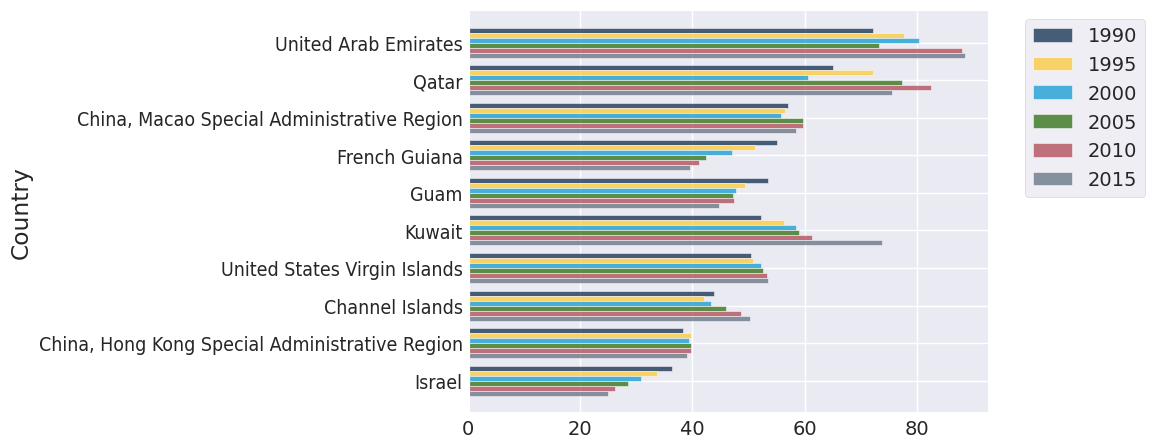

In [30]:
# figure
figure3 = data3_both_sex.barh("Country")

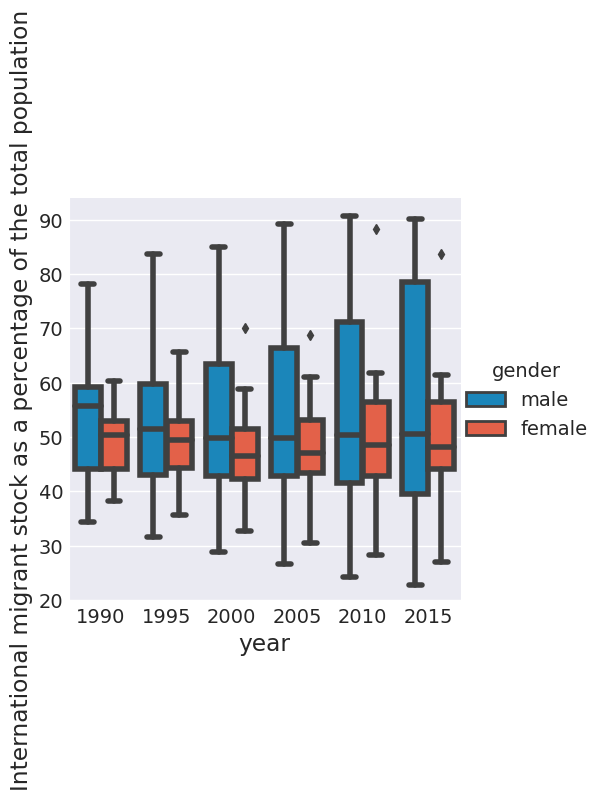

In [31]:
# chart
ch31 = data3_top.select("Country", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015",
                "f1990", "f1990", "f1995", "f2000", "f2005", "f2010", "f2015")
ch31 = ta_to_df(ch31)
ch31 = ch31.melt(id_vars = ["Country"], var_name = "genderyear", value_name = "International migrant stock as a percentage of the total population")
ch31 = ch31.assign(gender = lambda x: x.genderyear.str[0].astype(str), year = lambda x: x.genderyear.str[1:].astype(str)).drop("genderyear", axis = 1).replace(to_replace=["m", "f"], value=["male", "female"])


sns.set_style("darkgrid")
sns.catplot(data=ch31, kind="box", x="year", y="International migrant stock as a percentage of the total population", hue="gender")

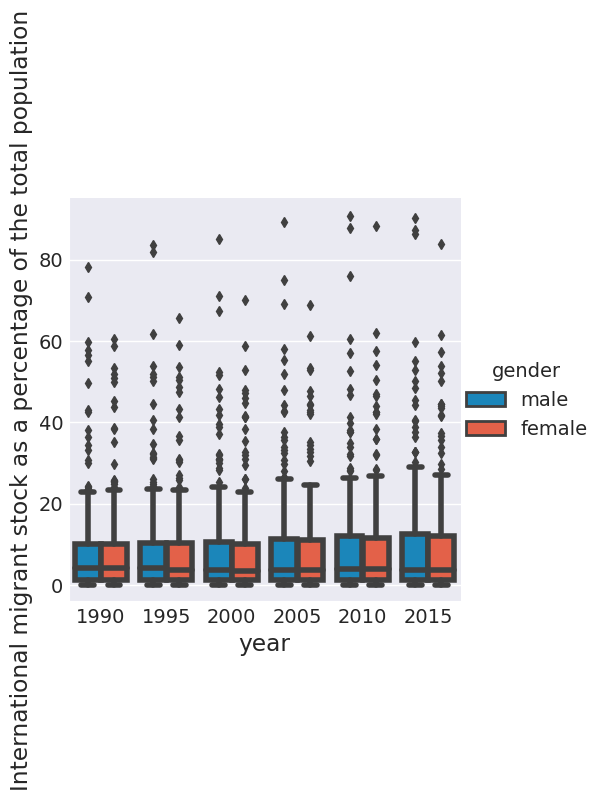

In [32]:
# chart
ch32 = df_to_ta(data3)
ch32 = ch32.select("Country", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015",
                "f1990", "f1990", "f1995", "f2000", "f2005", "f2010", "f2015")
ch32 = ta_to_df(ch32)
ch32 = ch32.melt(id_vars = ["Country"], var_name = "genderyear", value_name = "International migrant stock as a percentage of the total population")
ch32 = ch32.assign(gender = lambda x: x.genderyear.str[0].astype(str), year = lambda x: x.genderyear.str[1:].astype(str)).drop("genderyear", axis = 1).replace(to_replace=["m", "f"], value=["male", "female"])


sns.catplot(data=ch32, kind="box", x="year", y="International migrant stock as a percentage of the total population", hue="gender")

In [33]:
# Table 4 
data4 = pd_read_change(4)
data4 = data4.drop(columns=["Notes", "Type of data (a)"])
data4.columns = ["Country", "Country code", "f1990", "f1995", "f2000", "f2005", "f2010", "f2015"]

for item in data4.columns[1:]:
    data4[item] = pd.to_numeric(data4[item], errors='coerce')
data4 = data4.dropna()

data4 = data4[data4["Country code"] < 900]
data4 = data4.drop(columns=["Country code"])

data4 = df_to_ta(data4)
data4 = data4.sort("f1990", descending=True)
data4 = ta_to_df(data4)

data4

,Country,f1990,f1995,f2000,f2005,f2010,f2015
0,Nepal,70.703810,68.548227,66.296281,65.383681,67.248646,68.964340
1,Armenia,58.934500,58.934379,58.934489,59.199905,59.223235,59.499788
2,The former Yugoslav Republic of Macedonia,58.313889,58.313747,58.313771,58.313425,58.314122,58.314082
3,Kyrgyzstan,58.205247,58.205238,58.205197,58.598516,59.246861,59.577654
4,Barbados,58.104396,57.157566,56.357304,55.672022,55.076923,55.074692
...,...,...,...,...,...,...,...
223,United Arab Emirates,28.664890,28.187102,28.182370,27.209637,25.327245,25.325647
224,Qatar,27.060593,25.354671,23.757496,22.847068,17.154612,16.074459
225,Oman,20.237829,22.644415,21.683333,20.763480,19.293182,18.949711
226,Bhutan,18.473558,18.475618,18.474033,18.711984,18.870302,18.911674


In [35]:
append_list = ["m1990", "m1995", "m2000", "m2005", "m2010", "m2015"]
exist_list = ["f1990", "f1995", "f2000", "f2005", "f2010", "f2015"]
data4["m1990"] = 100 - data4["f1990"]
for i in range(len(append_list)):
    data4[append_list[i]] = 100 - data4[exist_list[i]]
data4


,Country,f1990,f1995,f2000,f2005,f2010,f2015,m1990,m1995,m2000,m2005,m2010,m2015
0,Nepal,70.703810,68.548227,66.296281,65.383681,67.248646,68.964340,29.296190,31.451773,33.703719,34.616319,32.751354,31.035660
1,Armenia,58.934500,58.934379,58.934489,59.199905,59.223235,59.499788,41.065500,41.065621,41.065511,40.800095,40.776765,40.500212
2,The former Yugoslav Republic of Macedonia,58.313889,58.313747,58.313771,58.313425,58.314122,58.314082,41.686111,41.686253,41.686229,41.686575,41.685878,41.685918
3,Kyrgyzstan,58.205247,58.205238,58.205197,58.598516,59.246861,59.577654,41.794753,41.794762,41.794803,41.401484,40.753139,40.422346
4,Barbados,58.104396,57.157566,56.357304,55.672022,55.076923,55.074692,41.895604,42.842434,43.642696,44.327978,44.923077,44.925308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,United Arab Emirates,28.664890,28.187102,28.182370,27.209637,25.327245,25.325647,71.335110,71.812898,71.817630,72.790363,74.672755,74.674353
224,Qatar,27.060593,25.354671,23.757496,22.847068,17.154612,16.074459,72.939407,74.645329,76.242504,77.152932,82.845388,83.925541
225,Oman,20.237829,22.644415,21.683333,20.763480,19.293182,18.949711,79.762171,77.355585,78.316667,79.236520,80.706818,81.050289
226,Bhutan,18.473558,18.475618,18.474033,18.711984,18.870302,18.911674,81.526442,81.524382,81.525967,81.288016,81.129698,81.088326


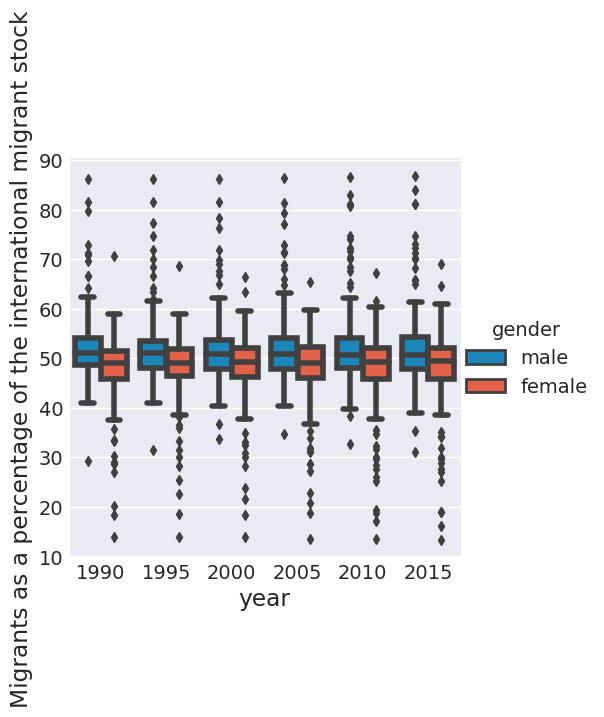

In [36]:
# chart
ch42 = df_to_ta(data4)
ch42 = ch42.select("Country", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015",
                "f1990", "f1990", "f1995", "f2000", "f2005", "f2010", "f2015")
ch42 = ta_to_df(ch42)
ch42 = ch42.melt(id_vars = ["Country"], var_name = "genderyear", value_name = "Migrants as a percentage of the international migrant stock")
ch42 = ch42.assign(gender = lambda x: x.genderyear.str[0].astype(str), year = lambda x: x.genderyear.str[1:].astype(str)).drop("genderyear", axis = 1).replace(to_replace=["m", "f"], value=["male", "female"])

sns.catplot(data=ch42, kind="box", x="year", y="Migrants as a percentage of the international migrant stock", hue="gender")

In [38]:
# Table 5
data5 = pd_read_change(5)
data5 = data5.drop(columns=["Notes", "Type of data (a)"])
data5.columns = ["Country", "Country code", "90-95", "95-00", "00-05",
                 "05-10", "10-15", "m90-95", "m95-00", "m00-05", "m05-10",
                 "m10-15", "f90-95", "f95-00", "f00-05", "f05-10", "f10-15"]

for item in data5.columns[1:]:
    data5[item] = pd.to_numeric(data5[item], errors='coerce')
data5 = data5.dropna()

data5 = data5[data5["Country code"] < 900]
data5 = data5.drop(columns=["Country code"])


data5 = df_to_ta(data5)
data5 = data5.sort("90-95", descending=True)
data5 = ta_to_df(data5)

In [39]:
data5_top = data5.head(10)
data5_top = df_to_ta(data5_top)
data5_top

Country,90-95,95-00,00-05,05-10,10-15,m90-95,m95-00,m00-05,m05-10,m10-15,f90-95,f95-00,f00-05,f05-10,f10-15
Serbia,36.9647,6.14182,-0.273654,-0.456079,-0.456094,36.4862,5.64106,-0.550363,-0.477935,-0.526485,37.3807,6.55777,-0.0517937,-0.438789,-0.400638
Republic of Korea,21.1553,13.5707,13.7475,12.7662,7.3467,21.4492,14.0969,13.6997,12.2873,6.99255,20.7706,12.8477,13.8152,13.4224,7.8088
Democratic Republic of the Congo,17.5854,-17.8472,-3.5645,-1.1199,-1.52566,18.184,-18.0755,-3.77525,-1.23108,-1.44399,17.0132,-17.625,-3.36371,-1.01563,-1.60214
Cambodia,17.5376,9.19806,-4.95437,-6.60063,-2.05748,17.316,9.13946,-4.39299,-5.63725,-1.69782,17.7544,9.25462,-5.50986,-7.63099,-2.46967
Iraq,17.3823,1.07981,-9.19789,-2.48433,22.0693,14.4496,0.959531,-7.96695,-2.06048,20.8676,22.2047,1.24184,-10.9726,-3.16158,23.8987
Liberia,15.7349,-6.34459,-11.0989,2.56711,2.75672,14.5553,-6.14102,-9.45767,2.11248,2.62985,17.1859,-6.5817,-13.222,3.19609,2.9263
Maldives,15.1251,7.61855,10.1685,9.82075,4.9102,13.2011,9.55929,11.9386,11.4468,6.41354,17.2482,5.47492,7.76551,7.08926,1.7466
Kenya,14.6596,2.44313,1.58747,4.05372,3.13666,13.8931,1.57539,2.31184,3.20594,3.29624,15.527,3.34506,0.84014,4.92303,2.97866
Mauritius,14.5886,14.5928,4.68629,4.68739,2.81176,12.0969,11.3896,8.99056,7.76872,3.65452,16.7051,16.7162,1.6873,1.69034,1.81264
United Republic of Tanzania,13.1174,-3.50637,-3.71474,-18.3089,-3.33351,13.1557,-2.99668,0.660451,-23.019,-3.32423,13.08,-4.01814,-9.51865,-12.1657,-3.34275


In [40]:
data5_both_sex = data5_top.select("Country", "90-95", "95-00", "00-05", "05-10", "10-15")
data5_both_sex

Country,90-95,95-00,00-05,05-10,10-15
Serbia,36.9647,6.14182,-0.273654,-0.456079,-0.456094
Republic of Korea,21.1553,13.5707,13.7475,12.7662,7.3467
Democratic Republic of the Congo,17.5854,-17.8472,-3.5645,-1.1199,-1.52566
Cambodia,17.5376,9.19806,-4.95437,-6.60063,-2.05748
Iraq,17.3823,1.07981,-9.19789,-2.48433,22.0693
Liberia,15.7349,-6.34459,-11.0989,2.56711,2.75672
Maldives,15.1251,7.61855,10.1685,9.82075,4.9102
Kenya,14.6596,2.44313,1.58747,4.05372,3.13666
Mauritius,14.5886,14.5928,4.68629,4.68739,2.81176
United Republic of Tanzania,13.1174,-3.50637,-3.71474,-18.3089,-3.33351


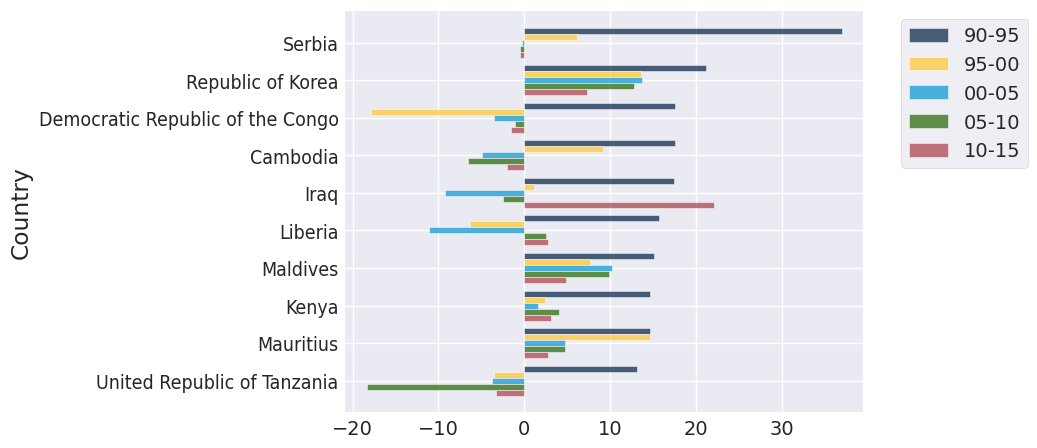

In [41]:
# figure
figure5 = data5_both_sex.barh("Country")

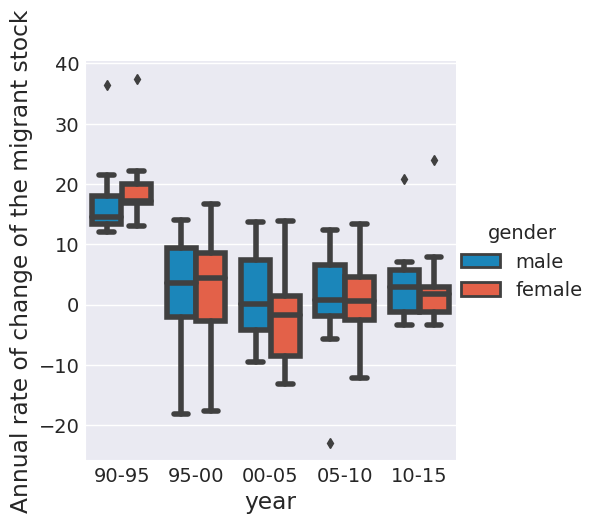

In [43]:
# chart
ch51 = data5_top.select("Country", "m90-95", "m95-00", "m00-05", "m05-10",
                 "m10-15", "f90-95", "f95-00", "f00-05", "f05-10", "f10-15")
ch51 = ta_to_df(ch51)
ch51 = ch51.melt(id_vars = ["Country"], var_name = "genderyear", value_name = "Annual rate of change of the migrant stock")
ch51 = ch51.assign(gender = lambda x: x.genderyear.str[0].astype(str), year = lambda x: x.genderyear.str[1:].astype(str)).drop("genderyear", axis = 1).replace(to_replace=["m", "f"], value=["male", "female"])


sns.set_style("darkgrid")
sns.catplot(data=ch51, kind="box", x="year", y="Annual rate of change of the migrant stock", hue="gender")


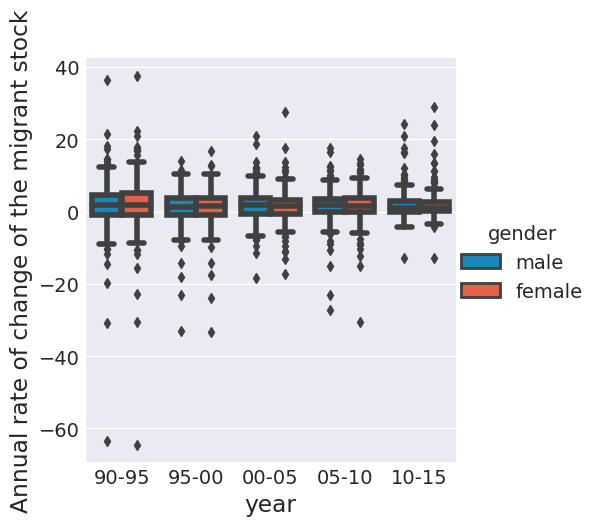

In [45]:
# chart
ch52 = df_to_ta(data5)
ch52 = ch52.select("Country", "m90-95", "m95-00", "m00-05", "m05-10",
                 "m10-15", "f90-95", "f95-00", "f00-05", "f05-10", "f10-15")
ch52 = ta_to_df(ch52)
ch52 = ch52.melt(id_vars = ["Country"], var_name = "genderyear", value_name = "Annual rate of change of the migrant stock")
ch52 = ch52.assign(gender = lambda x: x.genderyear.str[0].astype(str), year = lambda x: x.genderyear.str[1:].astype(str)).drop("genderyear", axis = 1).replace(to_replace=["m", "f"], value=["male", "female"])


sns.catplot(data=ch52, kind="box", x="year", y="Annual rate of change of the migrant stock", hue="gender")

In [52]:
# Table 6
data6 = pd_read_change(6)
data6 = data6.drop(columns=["Notes", "Type of data (a)"])
data6.columns = ["Country", "Country code", "e1990", "e1995", "e2000", "e2005", "e2010",
               "e2015", "p1990", "p1995", "p2000", "p2005", "p2010", "p2015",
                "90-95", "95-00", "00-05", "05-10", "10-15"]

for item in data6.columns[1:]:
    data6[item] = pd.to_numeric(data6[item], errors='coerce')
data6 = data6.dropna()

data6 = data6[data6["Country code"] < 900]
data6 = data6.drop(columns=["Country code"])

In [56]:
data6e = df_to_ta(data6)
data6e = data6e.sort("e1990", descending=True)
data6e = ta_to_df(data6e)

data6e_top = data6e.head(10)
data6e_top = df_to_ta(data6e_top)

data6e_top = data6e_top.select("Country", "e1990", "e1995", "e2000", "e2005", "e2010", "e2015")
data6e_top = ta_to_df(data6e_top)
data6e_top.columns = ["Country", "1990", "1995", "2000", "2005", "2010", "2015"]
data6e_top = df_to_ta(data6e_top)
data6e_top

Country,1990,1995,2000,2005,2010,2015
Iran (Islamic Republic of),3.5122e+06,2.07199e+06,1.85184e+06,974302,1.07337e+06,982085
Pakistan,3.26584e+06,1.20249e+06,2.00147e+06,1.08469e+06,1.90062e+06,1.61036e+06
Sudan,1.03105e+06,674071,414928,147256,144008,205174
Jordan,929482,1.25036e+06,1.57123e+06,1.97209e+06,2.37294e+06,2.75148e+06
State of Palestine,910637,1.15913e+06,1.40763e+06,1.68155e+06,1.95547e+06,2.0511e+06
Malawi,874614,1018,3900,4240,5740,5844
Ethiopia,741965,393479,197959,100817,154295,659524
Germany,722250,1.2679e+06,906000,700016,594269,216973
Somalia,460000,626,558,493,1937,2502
United States of America,438193,623294,508222,379340,264574,263662


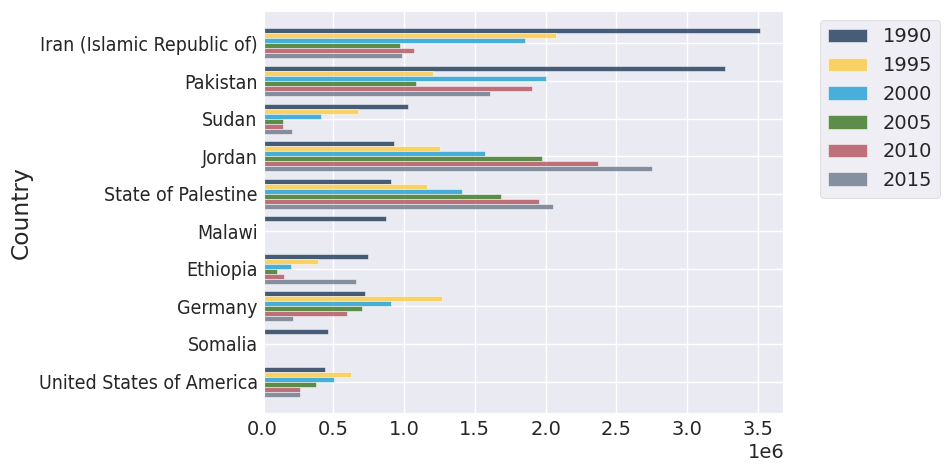

In [58]:
# figure
figure6e = data6e_top.barh("Country")

In [61]:
data6p = df_to_ta(data6)
data6p = data6p.sort("p1990", descending=True)
data6p = ta_to_df(data6p)

# The data of State of Palestine is an outlier since it exceeds 100 as a percentage.
data6p_top = data6p.head(11)
data6p_top = data6p_top.drop(data6p_top.index[0])
data6p_top = df_to_ta(data6p_top)

data6p_top = data6p_top.select("Country", "p1990", "p1995", "p2000", "p2005", "p2010", "p2015")
data6p_top = ta_to_df(data6p_top)
data6p_top.columns = ["Country", "1990", "1995", "2000", "2005", "2010", "2015"]
data6p_top = df_to_ta(data6p_top)
data6p_top

Country,1990,1995,2000,2005,2010,2015
Belize,100,26.1616,26.891,1.50637,0.289042,0.0185667
Somalia,96.1752,3.20582,2.77792,2.3851,8.07252,9.89285
Honduras,87.6937,79.3472,0.0386494,0.0466368,0.0513046,0.0926256
Guatemala,84.478,71.6976,1.50876,0.754559,0.207881,0.214795
Iran (Islamic Republic of),81.8389,70.5317,66.0475,37.9264,38.8681,36.021
Jordan,81.0819,81.3454,81.5021,84.8058,87.1448,88.4144
Guinea,80.5211,86.8036,76.2766,27.6664,6.88066,3.83779
Burundi,80.4326,67.8889,21.6003,11.963,12.482,16.6678
Malawi,77.5557,0.421316,1.67655,1.91283,2.63639,2.71614
China,75.9345,65.5243,57.8121,43.7952,35.4159,30.781


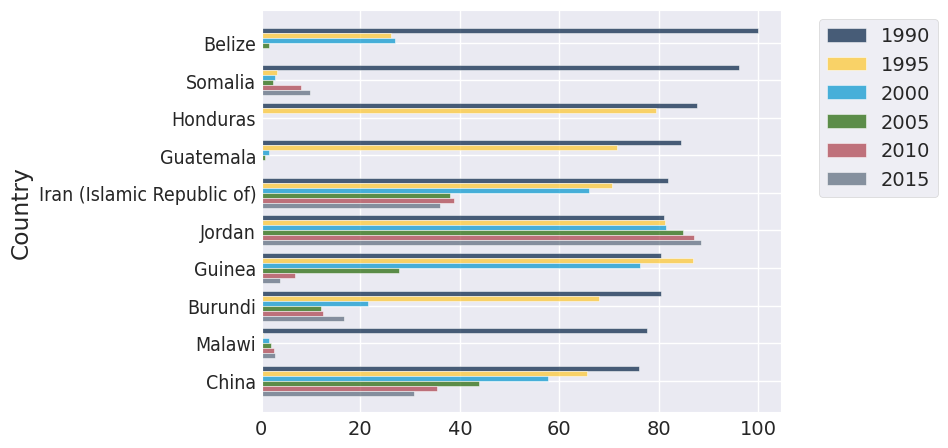

In [62]:
# figure
figure6p = data6p_top.barh("Country")

In [65]:
data6a = df_to_ta(data6)
data6a = data6a.sort("90-95", descending=True)
data6a = ta_to_df(data6a)

data6a_top = data6a.head(10)
data6a_top = df_to_ta(data6a_top)

data6a_top = data6a_top.select("Country", "90-95", "95-00", "00-05", "05-10", "10-15")
data6a_top

Country,90-95,95-00,00-05,05-10,10-15
Liberia,121.617,-4.64535,-27.2894,15.2124,5.92932
Bangladesh,99.1264,12.691,31.5847,9.1843,-0.828103
Gambia,97.7257,8.1809,-8.07411,0.508612,5.80506
Serbia,84.6356,-8.55789,-19.0032,-12.1962,-9.94321
Iraq,79.9208,0.731582,-9.49827,-4.92027,19.077
Niger,66.3433,-119.769,32.5765,0.526349,97.3495
Ghana,51.6381,-31.5899,19.0614,-29.107,2.36722
Kenya,42.5211,-5.03849,2.37536,5.38965,3.13679
Central African Republic,38.1495,5.65947,-10.9876,-2.39069,-17.9051
Tunisia,37.9038,-1.80541,-7.96113,-4.35182,36.7523


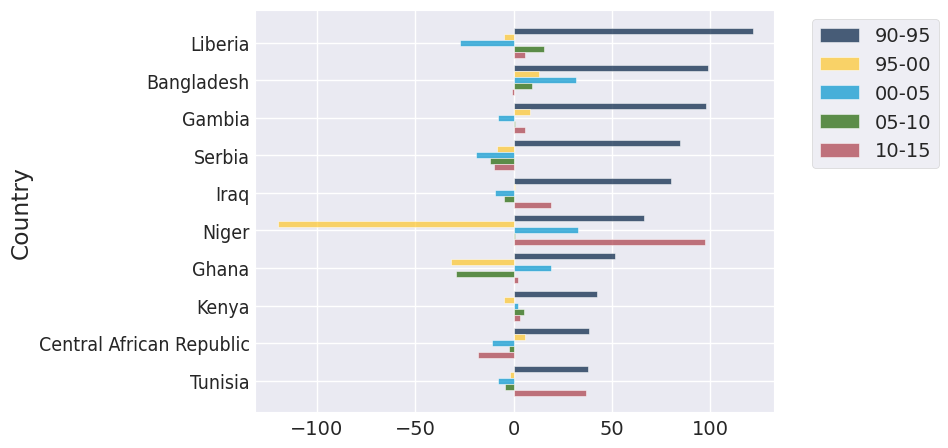

In [66]:
# figure
figure6a = data6a_top.barh("Country")

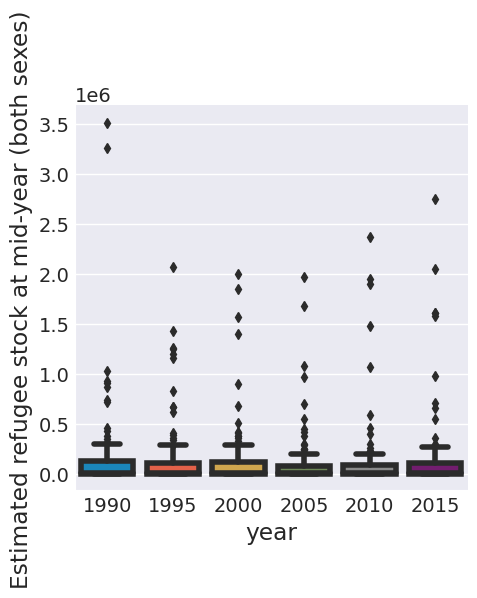

In [67]:
# chart
ch62 = df_to_ta(data6)
ch62 = ch62.select("Country", "Country", "e1990", "e1995", "e2000", "e2005", "e2010", "e2015")
ch62 = ta_to_df(ch62)
ch62 = ch62.melt(id_vars = ["Country"], var_name = "genderyear", value_name = "Estimated refugee stock at mid-year (both sexes)")
ch62 = ch62.assign(year = lambda x: x.genderyear.str[1:].astype(str)).drop("genderyear", axis = 1)

sns.catplot(data=ch62, kind="box", x="year", y="Estimated refugee stock at mid-year (both sexes)")

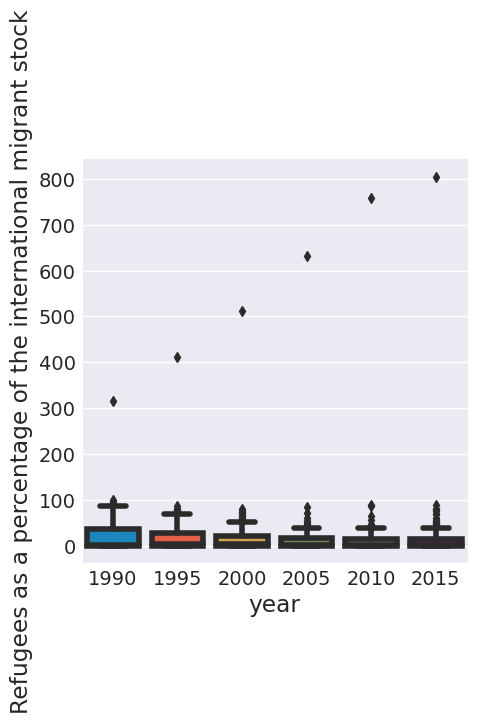

In [68]:
# chart
ch63 = df_to_ta(data6)
ch63 = ch63.select("Country", "Country", "p1990", "p1995", "p2000", "p2005", "p2010", "p2015")
ch63 = ta_to_df(ch63)
ch63 = ch63.melt(id_vars = ["Country"], var_name = "genderyear", value_name = "Refugees as a percentage of the international migrant stock")
ch63 = ch63.assign(year = lambda x: x.genderyear.str[1:].astype(str)).drop("genderyear", axis = 1)

sns.catplot(data=ch63, kind="box", x="year", y="Refugees as a percentage of the international migrant stock")

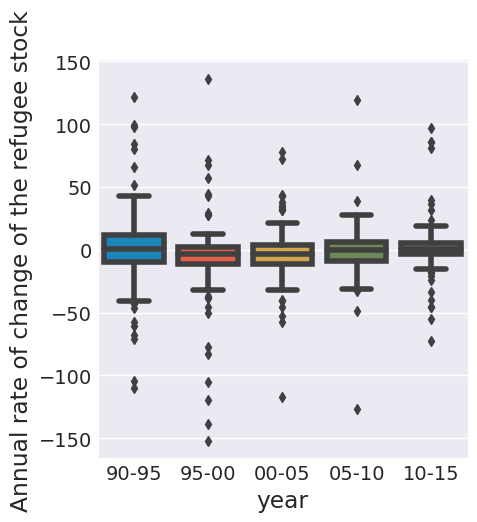

In [69]:
# chart
ch64 = df_to_ta(data6)
ch64 = ch64.select("Country", "Country", "90-95", "95-00", "00-05", "05-10", "10-15")
ch64 = ta_to_df(ch64)
ch64 = ch64.melt(id_vars = ["Country"], var_name = "year", value_name = "Annual rate of change of the refugee stock")

sns.catplot(data=ch64, kind="box", x="year", y="Annual rate of change of the refugee stock")